Integrantes:
- Rodrigo Mansilla
- Sergio Orellana
- Carlos Valladares

### Práctica - Ejercicio 1

   Tiempo (meses)  Solución Euler  Solución Exacta  Error Absoluto
0             0.0      1000.00000      1000.000000        0.000000
1             0.1       990.00000       990.049834        0.049834
2             0.2       980.10000       980.198673        0.098673
3             0.3       970.29900       970.445534        0.146534
4             0.4       960.59601       960.789439        0.193429


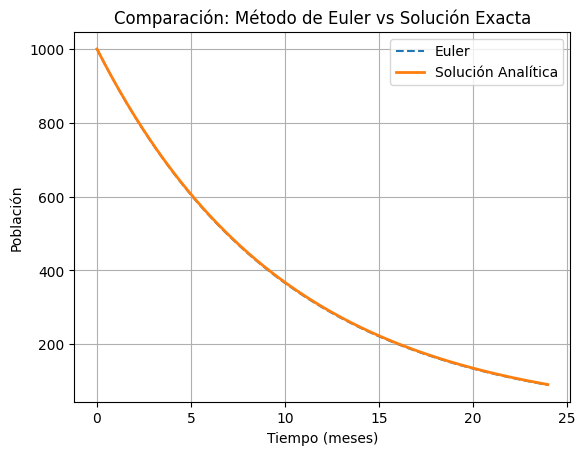

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros del modelo
S0 = 1000                    # Población inicial
alpha = 0.1                 # Tasa de mortalidad (mes^-1)
dt = 0.1                    # Paso de integración (meses)
T = 24                      # Horizonte de tiempo (meses)
N = int(T / dt)             # Número de pasos

# Tiempo
t = np.linspace(0, T, N+1)

# Inicialización de arrays
S_euler = np.zeros(N+1)
S_exact = np.zeros(N+1)

# Condición inicial
S_euler[0] = S0
S_exact[0] = S0

# Simulación por Euler
for i in range(N):
    dS = -alpha * S_euler[i]
    S_euler[i+1] = S_euler[i] + dS * dt
    S_exact[i+1] = S0 * np.exp(-alpha * t[i+1])

# Mostrar datos en tabla
df = pd.DataFrame({
    "Tiempo (meses)": t,
    "Solución Euler": S_euler,
    "Solución Exacta": S_exact,
    "Error Absoluto": np.abs(S_euler - S_exact)
})

# Mostrar primeras filas como muestra
print(df.head())

# Gráfica
plt.plot(t, S_euler, label="Euler", linestyle="--")
plt.plot(t, S_exact, label="Solución Analítica", linewidth=2)
plt.xlabel("Tiempo (meses)")
plt.ylabel("Población")
plt.title("Comparación: Método de Euler vs Solución Exacta")
plt.legend()
plt.grid(True)
plt.show()
